# uas pendat

- naive bayes

In [1]:

%matplotlib inline
import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
data = pd.read_csv('Stars.csv')
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report

lakukan data ekplorasi

In [4]:
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [5]:
data.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [6]:
print(f"shape: {data.shape}")
print('\n')
print(f"missing value:\n{data.isnull().sum()}")
print('\n')

shape: (240, 7)


missing value:
Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64




Kode di bawah menciptakan sebuah diagram boxplot dengan ukuran (15,5) untuk menganalisis distribusi data set setelah menghapus kolom 'Type'. Diagram ini memberikan visualisasi tentang statistik ringkas seperti median, kuartil, dan titik ekstrem dari data tersebut. Sumbar x menunjukkan nilai-nilai dari data, sementara sumbu y menunjukkan tipe data. Melalui diagram boxplot ini, dapat diperoleh pemahaman yang ringkas mengenai sebaran data dan adanya nilai-nilai ekstrim di luar rentang kuartil.

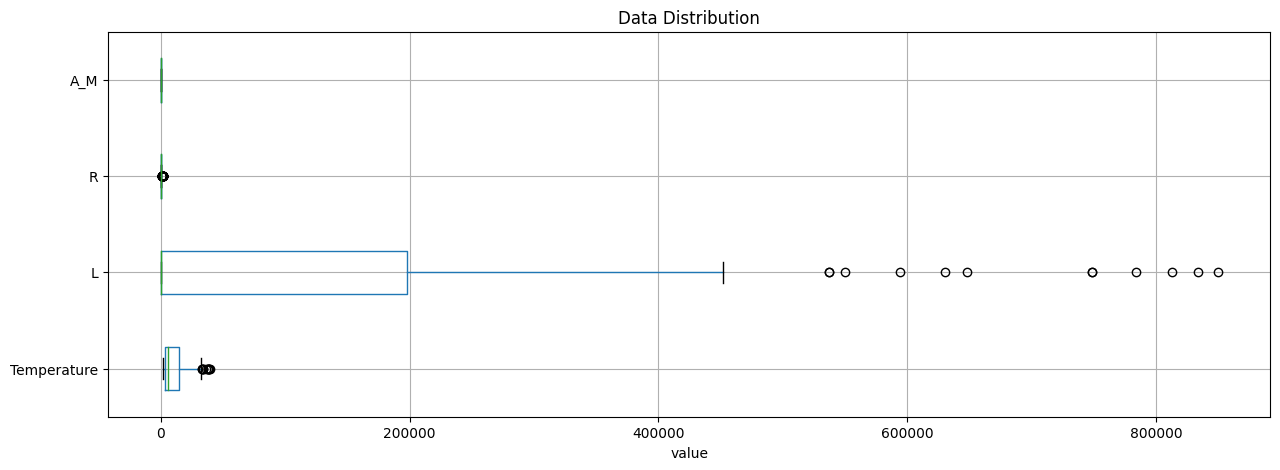

In [7]:
plt.figure(figsize=(15,5))
data.drop('Type',axis=1).boxplot(vert=False)
plt.title('Data Distribution')
plt.xlabel('value')
plt.show()

Kode di di bawahmenciptakan sebuah gambar dengan ukuran (5,3) menggunakan fungsi `plt.figure(figsize=(5,3))`. Gambar ini digunakan untuk menampilkan diagram batang (bar plot) yang menggambarkan jumlah catatan (record) untuk setiap tipe dalam kolom 'Type' dari dataset. Fungsi `data.Type.value_counts()` digunakan untuk menghitung jumlah kemunculan setiap tipe, kemudian fungsi `plot.bar()` digunakan untuk membuat diagram batang berdasarkan perhitungan tersebut. Fungsi `plt.title('Record count of each Type')` memberikan judul gambar yaitu "Record count of each Type". Terakhir, fungsi `plt.show()` digunakan untuk menampilkan gambar diagram batang yang telah dibuat. Melalui diagram ini, kita dapat dengan jelas melihat perbandingan jumlah catatan antara berbagai tipe yang ada dalam dataset.

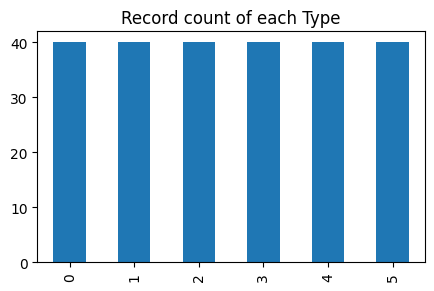

In [8]:
plt.figure(figsize=(5,3))
data.Type.value_counts().plot.bar()
plt.title('Record count of each Type')
plt.show()

In [9]:
col_num = ['Temperature', 'L', 'R', 'A_M']
col_cat = ['Color','Spectral_Class']

Dalam kode di atas, variabel `col_num` berisi kolom-kolom numerik dalam dataset seperti 'Temperature', 'L', 'R', dan 'A_M', sedangkan variabel `col_cat` berisi kolom-kolom kategorikal seperti 'Color' dan 'Spectral_Class'. Dengan memisahkan kolom-kolom menjadi numerik dan kategorikal, kita dapat dengan mudah mengidentifikasi jenis data yang berbeda dan menerapkan teknik analisis yang sesuai. Kolom-kolom numerik dapat digunakan untuk perhitungan statistik dan pemodelan numerik, sementara kolom-kolom kategorikal dapat digunakan untuk analisis frekuensi dan pemodelan kategorikal. Pemisahan ini memungkinkan untuk pemahaman yang lebih baik tentang dataset dan pemrosesan data yang lebih tepat sesuai dengan jenis data yang ada.

C:\Users\asus\AppData\Local\Temp\ipykernel_8740\3905330080.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Type').mean()[c].plot.bar(ax=ax)
C:\Users\asus\AppData\Local\Temp\ipykernel_8740\3905330080.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Type').mean()[c].plot.bar(ax=ax)
C:\Users\asus\AppData\Local\Temp\ipykernel_8740\3905330080.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the functi

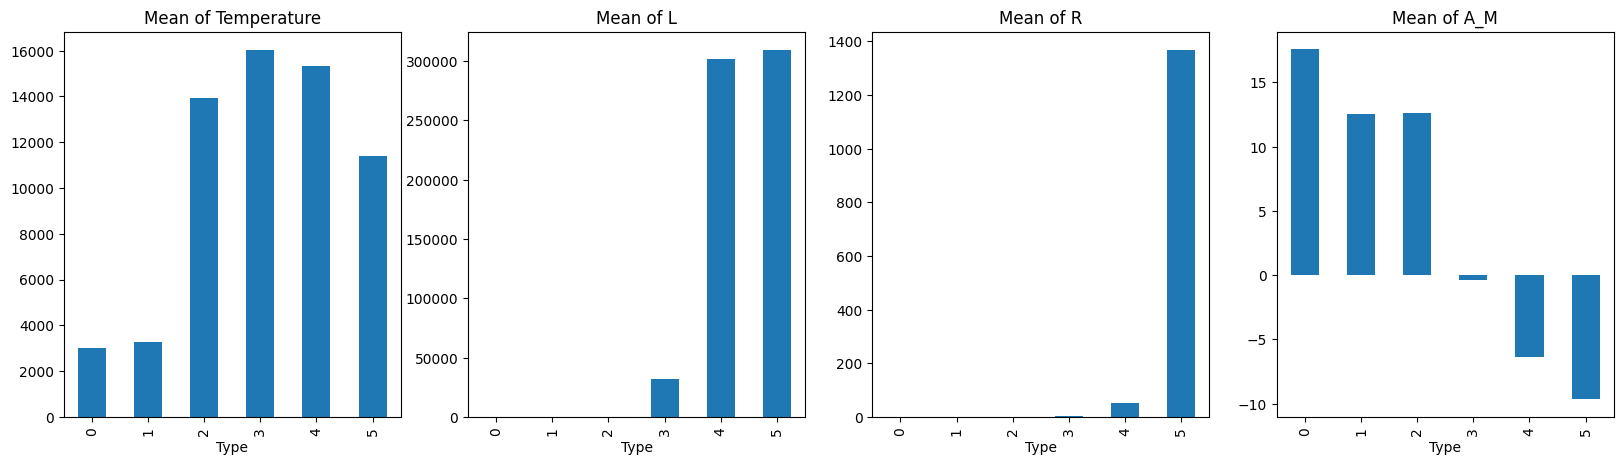

In [10]:
i=1
plt.figure(figsize=(20,5))
for c in col_num:
  ax = plt.subplot(1,4,i)
  data.groupby('Type').mean()[c].plot.bar(ax=ax)
  ax.set_title(f'Mean of {c}')
  i+=1
plt.show()

Kode di atas menghasilkan sebuah gambar dengan ukuran (20,5) yang terdiri dari empat diagram batang. Setiap diagram batang menampilkan rata-rata dari kolom-kolom numerik dalam variabel `col_num` untuk setiap tipe dalam dataset. Melalui loop `for`, kolom-kolom numerik diiterasi satu per satu dan dihitung rata-ratanya berdasarkan tipe data. Kemudian, hasil perhitungan tersebut direpresentasikan dalam bentuk diagram batang menggunakan fungsi `plot.bar()`. Judul setiap diagram batang ditetapkan dengan menggunakan fungsi `ax.set_title()` dengan format "Mean of [nama kolom]". Dengan demikian, gambar ini memberikan pemahaman visual tentang perbandingan rata-rata dari kolom-kolom numerik untuk setiap tipe dalam dataset.

C:\Users\asus\AppData\Local\Temp\ipykernel_8740\2441172796.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  num_corr=data.drop('Type',axis=1).corr()


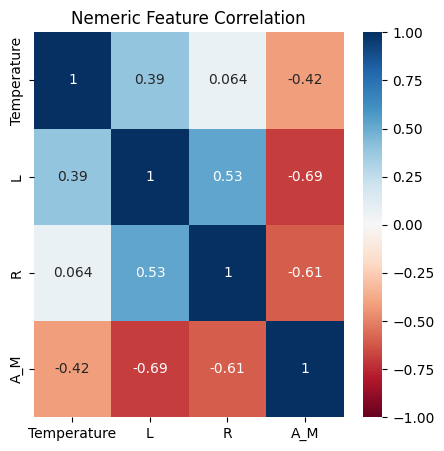

In [11]:
plt.figure(figsize=(5,5))
# Correlation
num_corr=data.drop('Type',axis=1).corr()
sns.heatmap(num_corr,vmin=-1,vmax=1,annot=True,cmap='RdBu')
plt.title('Nemeric Feature Correlation')
plt.show()

Kode tersebut menghasilkan sebuah gambar berukuran (5,5) yang menampilkan peta panas (heatmap) korelasi antara fitur-fitur numerik dalam dataset, setelah kolom 'Type' dihapus. Peta panas ini digambarkan menggunakan fungsi `sns.heatmap()` dengan matriks korelasi sebagai input. Fungsi `plt.title()` memberikan judul gambar sebagai "Numeric Feature Correlation", dan fungsi `plt.show()` digunakan untuk menampilkan gambar peta panas. Dengan melihat peta panas ini, kita dapat secara visual memahami hubungan korelasi antara fitur-fitur numerik dalam dataset.

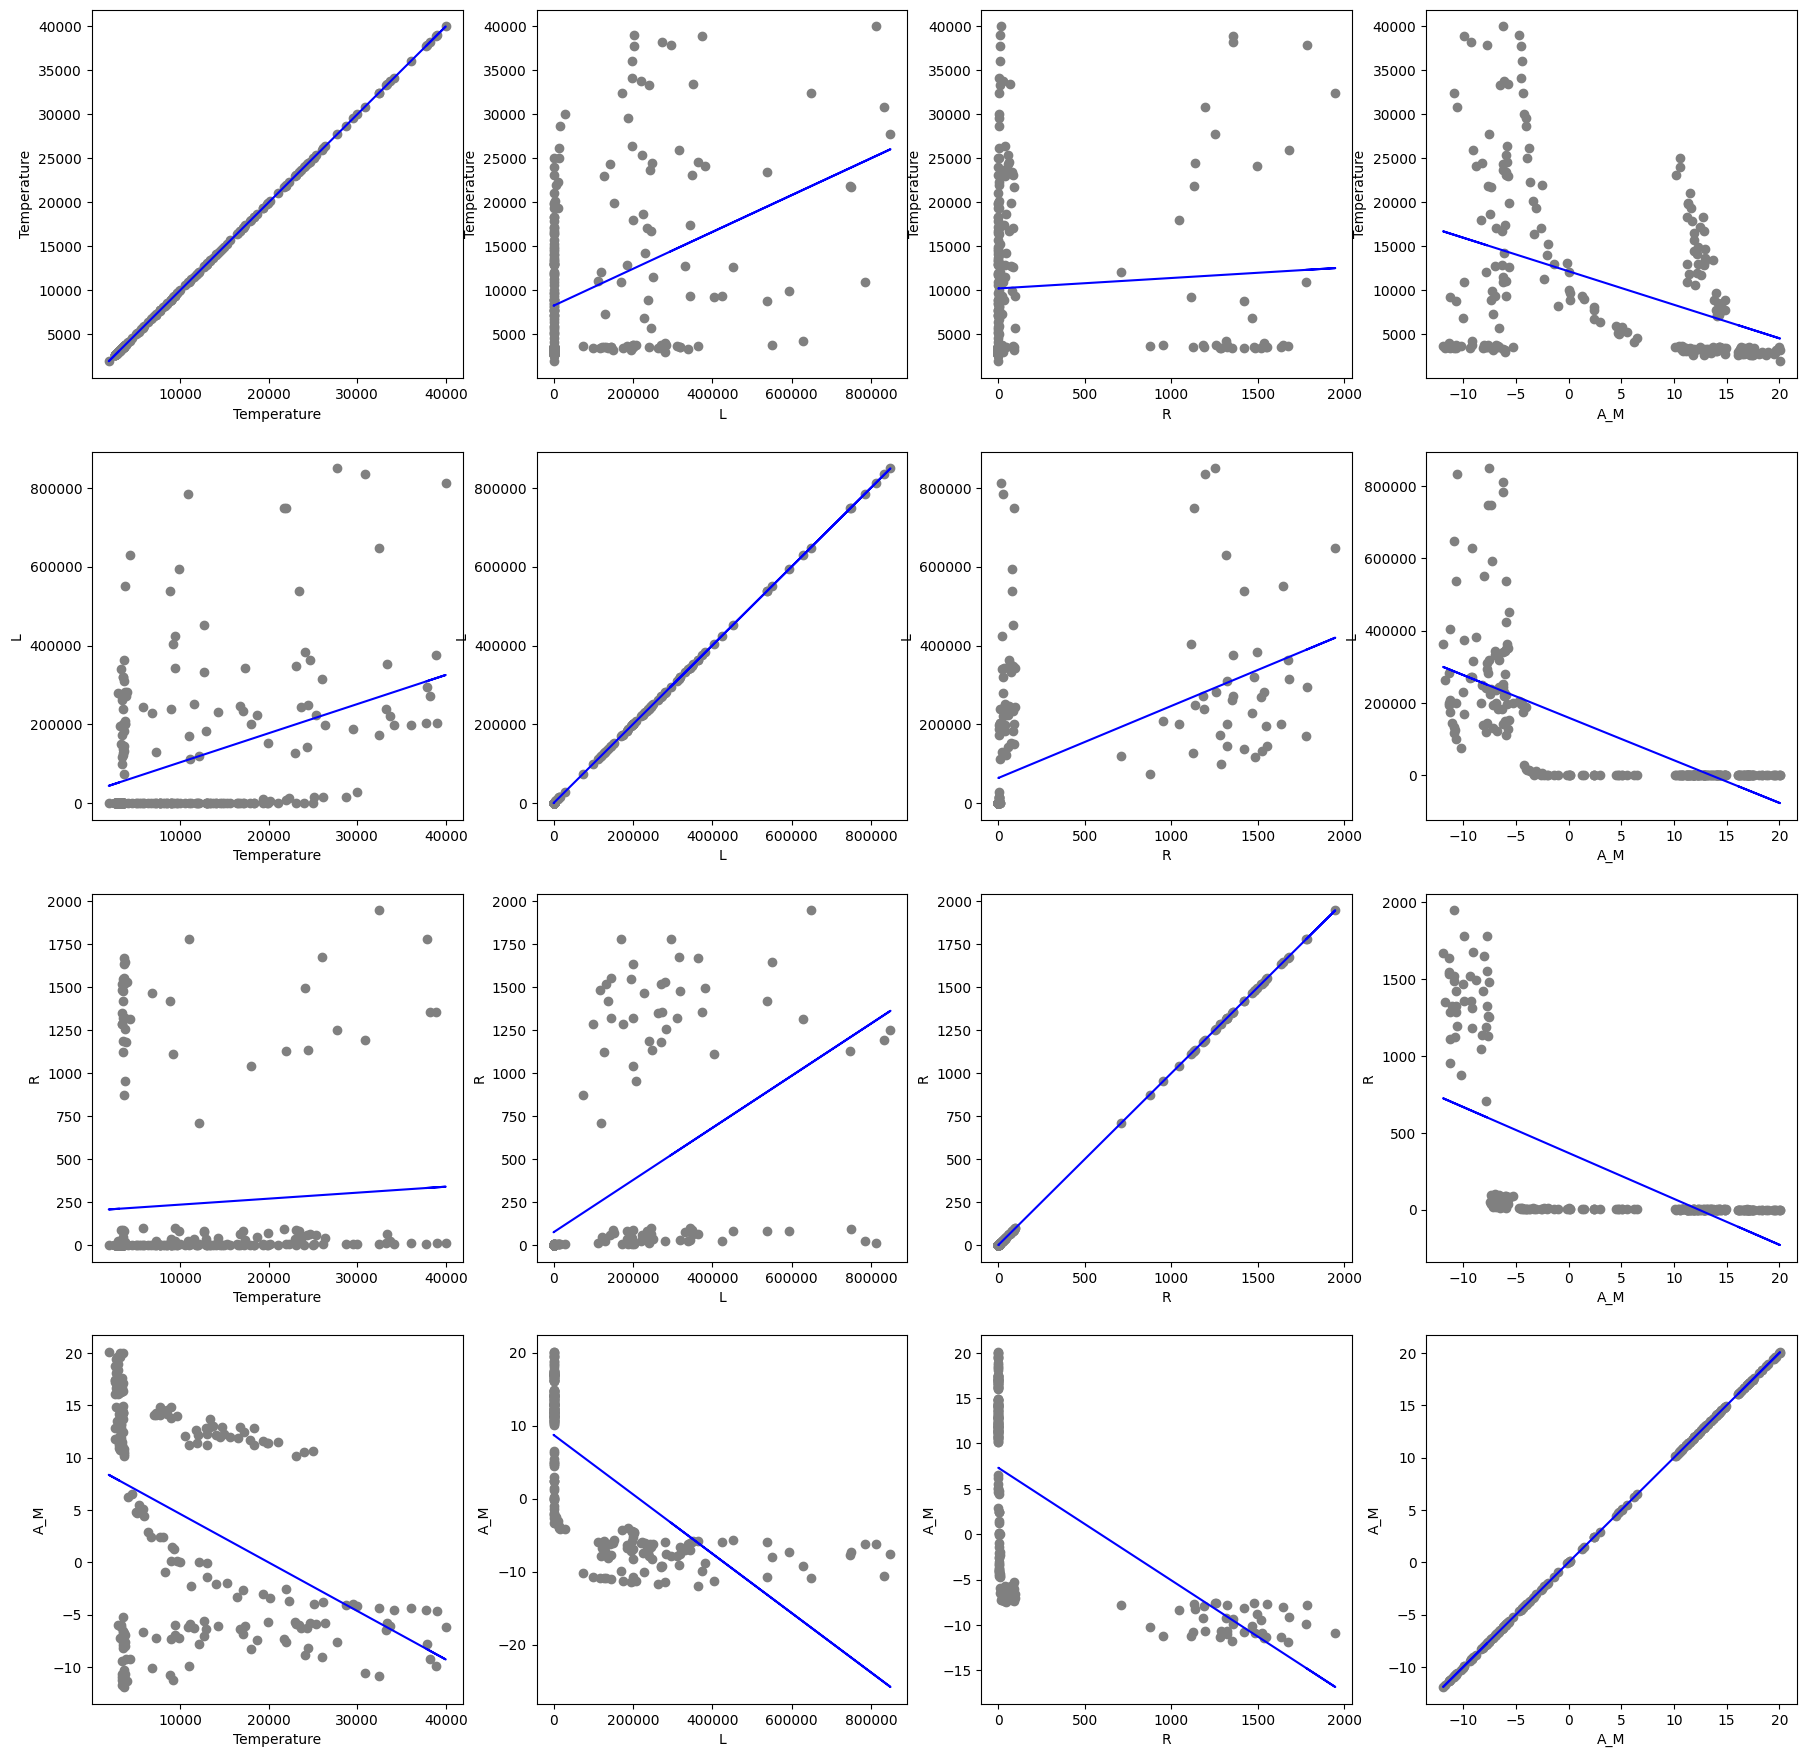

In [12]:
a = 1
plt.figure(figsize=(22,22))
for j in range(len(col_num)):
    for k in range(len(col_num)):
        ax = plt.subplot(4,4,a)
        plt.scatter(data[col_num[k]],data[col_num[j]],color='gray')
        m, c = np.polyfit(data[col_num[k]],data[col_num[j]], 1)
        plt.plot(data[col_num[k]], m*data[col_num[k]] + c,'blue')
        plt.xlabel(col_num[k])
        plt.ylabel(col_num[j])
        a+=1
plt.show()

Kode di atas menghasilkan scatter plot dan garis regresi untuk setiap kombinasi pasangan fitur numerik dalam dataset. Pada setiap subplot, scatter plot ditampilkan dengan warna abu-abu, sementara garis regresi ditampilkan dengan warna biru. Garis regresi menggambarkan hubungan linier antara kedua fitur. Setiap subplot memiliki sumbu x dan y yang sesuai dengan fitur numerik yang dipilih. Kode tersebut menggunakan nested loop untuk mengiterasi melalui semua pasangan fitur numerik dan menghasilkan plot untuk setiap kombinasinya. Hasilnya adalah matriks subplot yang memvisualisasikan hubungan antara setiap pasangan fitur numerik dalam dataset.

In [13]:
data.Color.value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
yellowish               2
Whitish                 2
Orange                  2
White-Yellow            1
Pale yellow orange      1
Yellowish               1
Orange-Red              1
Blue-White              1
Name: Color, dtype: int64

In [14]:
mengetahui data color value

SyntaxError: invalid syntax (2021289440.py, line 1)

In [14]:
data.Color=list(map(lambda x: x.lower(),data.Color.values))
data.Color.replace('\W','',regex=True,inplace=True)
data.Color.value_counts()

red                 112
blue                 56
bluewhite            41
white                10
yellowwhite           8
yellowishwhite        3
yellowish             3
whitish               2
orange                2
paleyelloworange      1
whiteyellow           1
orangered             1
Name: Color, dtype: int64

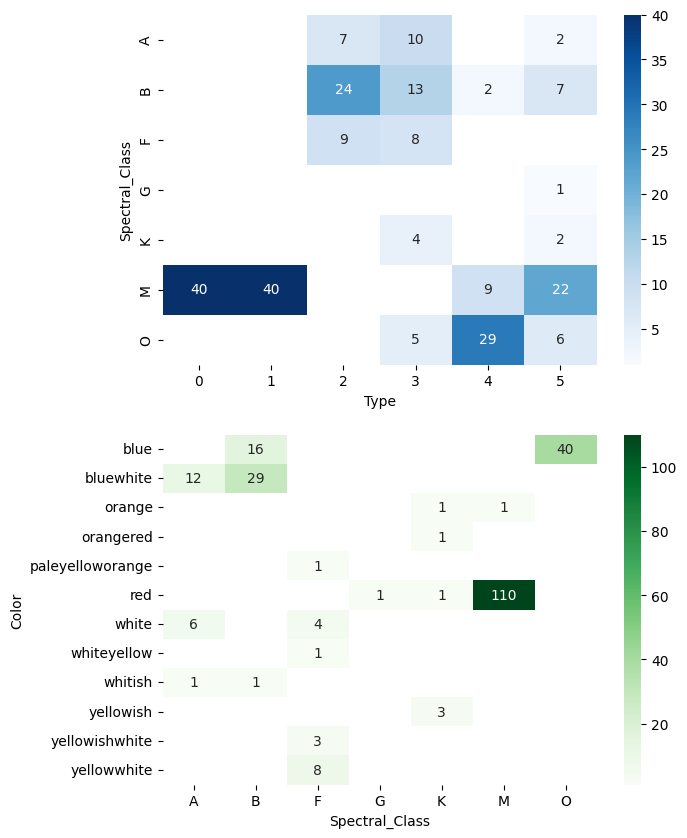

In [15]:
plt.figure(figsize=(7,10))
# Map class and count values between Color and Spectrum
ax1 = plt.subplot(2,1,1)
cat_dep1 = data.pivot_table(index='Spectral_Class',columns='Type', aggfunc='size')
mask1=cat_dep1.isnull()
sns.heatmap(cat_dep1,annot=True,fmt='g',cmap='Blues',mask=mask1,ax=ax1)

ax2 = plt.subplot(2,1,2)
cat_dep2 = data.pivot_table(index='Color',columns='Spectral_Class', aggfunc='size')
mask2=cat_dep2.isnull()
sns.heatmap(cat_dep2,annot=True,fmt='g',cmap='Greens',mask=mask2,ax=ax2)

plt.show()

data preparation bertujuan untuk menyiapkan data

In [16]:
data_enc = pd.get_dummies(data.drop('Type',axis=1), prefix=('c','S'))
data_enc.head()

,Temperature,L,R,A_M,c_blue,c_bluewhite,c_orange,c_orangered,c_paleyelloworange,c_red,...,c_yellowish,c_yellowishwhite,c_yellowwhite,S_A,S_B,S_F,S_G,S_K,S_M,S_O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [17]:
min = data_enc.min()
max = data_enc.max()
data_norm = (data_enc - min) / (max - min)
data_norm.head()

,Temperature,L,R,A_M,c_blue,c_bluewhite,c_orange,c_orangered,c_paleyelloworange,c_red,...,c_yellowish,c_yellowishwhite,c_yellowwhite,S_A,S_B,S_F,S_G,S_K,S_M,S_O
0,0.029663,2.731275e-09,0.000083,0.876798,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.028980,4.944550e-10,0.000075,0.891807,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.017367,2.590003e-10,0.000048,0.957473,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.022622,1.412729e-10,0.000078,0.893371,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,6.828189e-11,0.000049,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


mendeskirpsikan data data

In [18]:
data_norm.describe()

,Temperature,L,R,A_M,c_blue,c_bluewhite,c_orange,c_orangered,c_paleyelloworange,c_red,...,c_yellowish,c_yellowishwhite,c_yellowwhite,S_A,S_B,S_F,S_G,S_K,S_M,S_O
count,240.000000,2.400000e+02,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.224862,1.261901e-01,0.121709,0.509768,0.233333,0.170833,0.008333,0.004167,0.004167,0.466667,...,0.012500,0.012500,0.033333,0.079167,0.191667,0.070833,0.004167,0.025000,0.462500,0.166667
std,0.250977,2.112409e-01,0.265413,0.329347,0.423836,0.377150,0.091096,0.064550,0.064550,0.499930,...,0.111335,0.111335,0.179881,0.270563,0.394435,0.257082,0.064550,0.156451,0.499634,0.373457
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.036921,9.238657e-10,0.000048,0.177846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.100812,8.290363e-08,0.000387,0.632677,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.344618,2.331591e-01,0.021936,0.801048,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


membagi data menjadi data train dan tes

In [125]:
train_x,train_y,test_x,test_y = train_test_split(data_norm,data.Type,test_size=0.3, random_state=42)

In [126]:
#Transform dataframe to array
train_xa = np.array(train_x)
test_xa = np.array(test_x)
train_ya = np.array(train_y)
test_ya = np.array(test_y)
print(train_xa.shape)
print(test_xa.shape)
print(train_ya.shape)
print(test_xa.shape)

(168, 23)
(168,)
(72, 23)
(168,)


Model training

In [21]:
model_g = [GaussianNB(),'GaussianNB()']
model_g[0].fit(train_xa,test_xa)

GaussianNB()

In [22]:
def modelEvaluate(model,y_train,y_test):
  y_pred = model[0].predict(y_train)
  plt.figure(figsize=(5,5))
  conf = confusion_matrix(y_test,y_pred)
  sns.heatmap(conf,annot=True,cmap='Blues')
  plt.title(f'Confusion Metrix\n-- {model[1]} --')
  plt.ylabel('Prediction')
  plt.xlabel('Actual')
  plt.show()
  print(classification_report(y_test,y_pred))

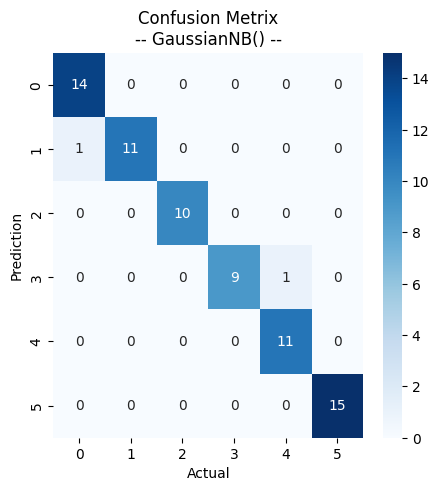

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00        10
           3       1.00      0.90      0.95        10
           4       0.92      1.00      0.96        11
           5       1.00      1.00      1.00        15

    accuracy                           0.97        72
   macro avg       0.98      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



In [23]:
modelEvaluate(model_g,train_ya,test_ya)

model tuning

In [24]:
model_tune = [GaussianNB(var_smoothing=0.01),'GaussianNB(var_smoothing=0.01)']
model_tune[0].fit(train_xa,test_xa)

GaussianNB(var_smoothing=0.01)

lalu gunakan mode evaluasi dengan confusion matrix

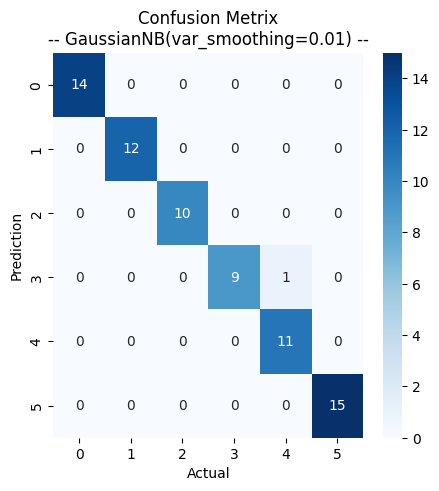

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10
           3       1.00      0.90      0.95        10
           4       0.92      1.00      0.96        11
           5       1.00      1.00      1.00        15

    accuracy                           0.99        72
   macro avg       0.99      0.98      0.98        72
weighted avg       0.99      0.99      0.99        72



In [25]:
modelEvaluate(model_tune,train_ya,test_ya)

di ketahui akurasinya adalah 0.99%

## decision tree

In [27]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt


import seaborn as sns



from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

import data

In [70]:
df = pd.read_csv("Stars.csv")
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [71]:
df.Type.value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Type, dtype: int64

In [72]:
df.shape

(240, 7)

cek apakah data ada yang hilang

In [73]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


melihat value warna

In [127]:
df.Color.value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
yellowish               2
Whitish                 2
Orange                  2
White-Yellow            1
Pale yellow orange      1
Yellowish               1
Orange-Red              1
Blue-White              1
Name: Color, dtype: int64

melihat spektral

In [75]:
df.Spectral_Class.value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64

In [ ]:
menampilkan ploting menggunaka seaborn

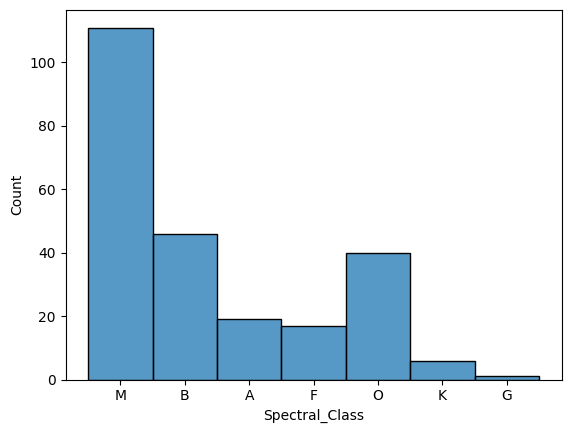

In [76]:
sns.histplot(data = df ,x = "Spectral_Class" )
plt.show()

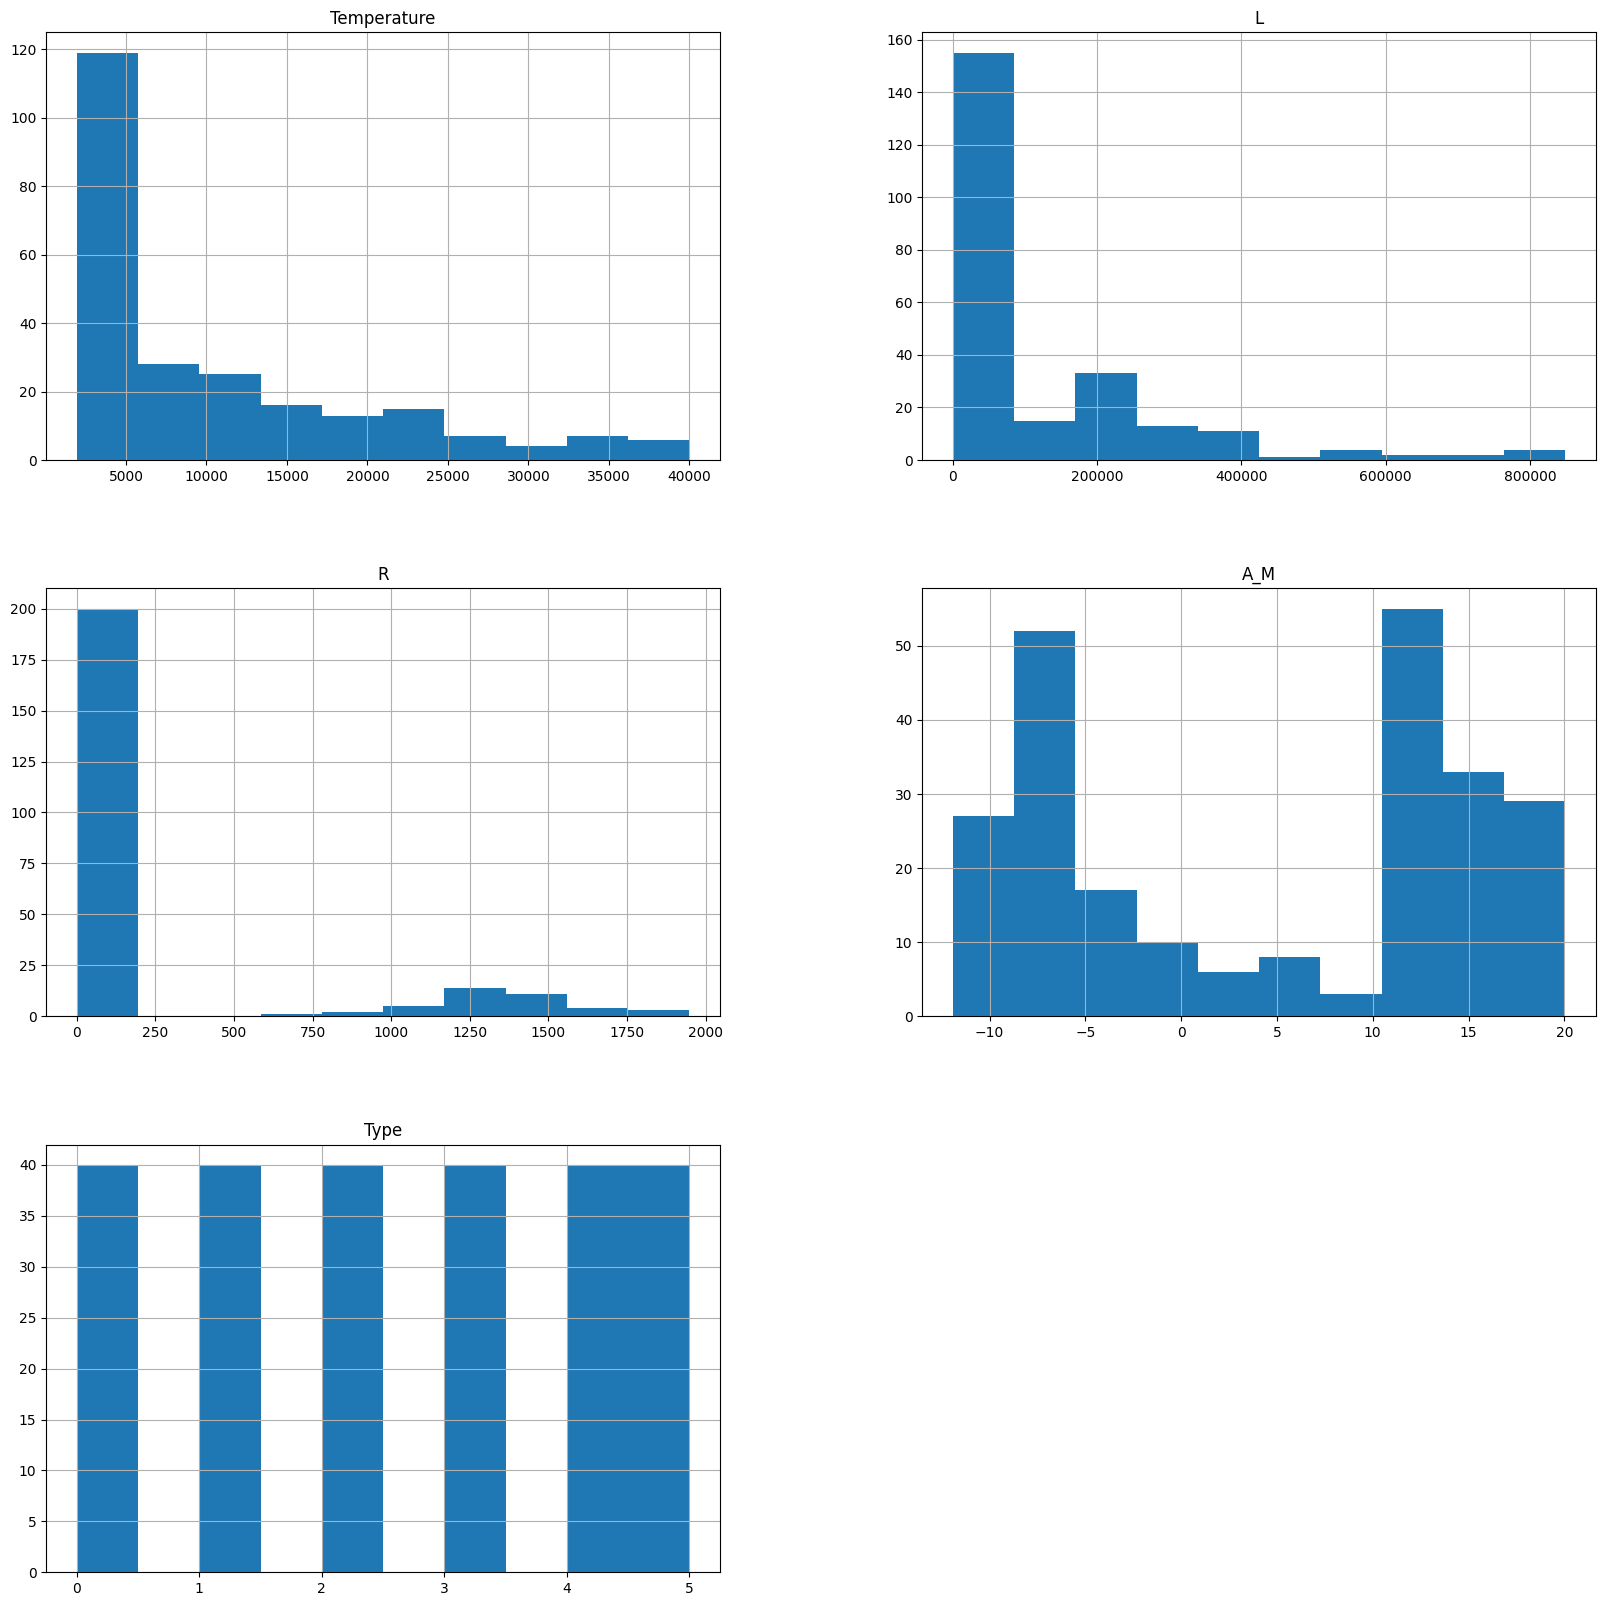

In [77]:
df.hist(figsize=(20,20))
plt.show()

heatmap


C:\Users\asus\AppData\Local\Temp\ipykernel_8888\3621900207.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

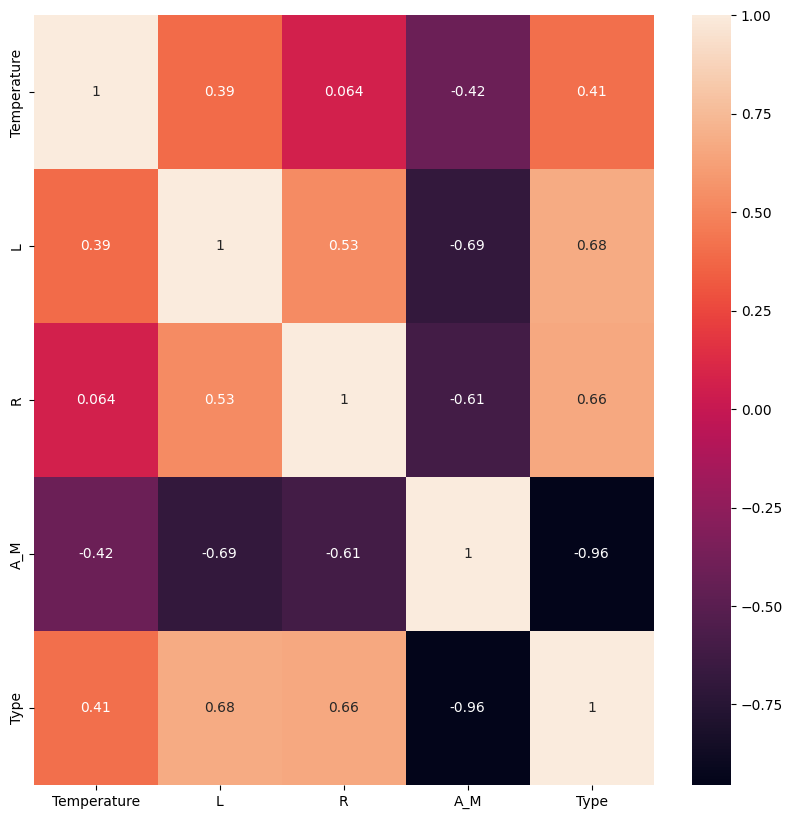

In [78]:
plt.figure(figsize=(10,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

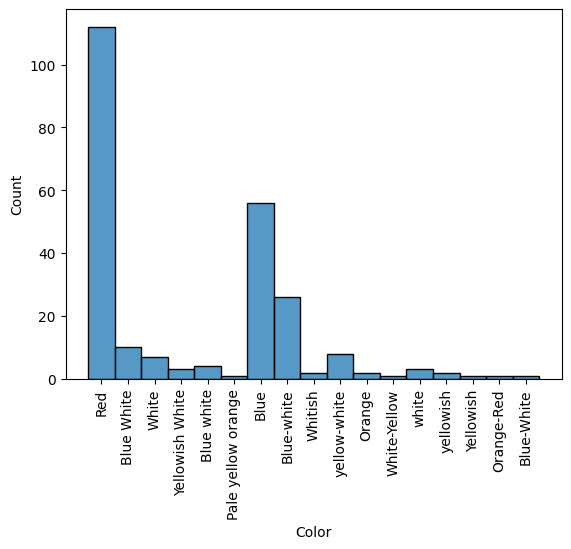

In [79]:
sns.histplot(data = df , x = "Color");
plt.xticks(rotation=90)
plt.show()

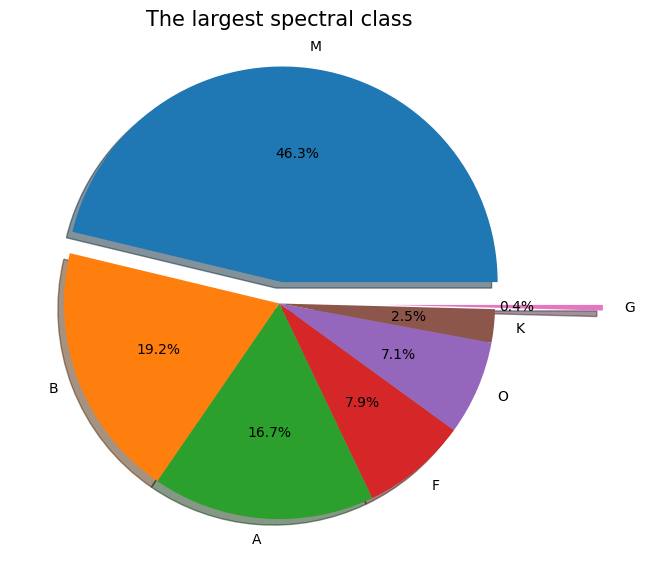

In [80]:
plt.figure(figsize=(12,7))
plt.pie(df.Spectral_Class.value_counts() ,labels = df.Spectral_Class.unique(),explode = [0.1,0,0,0,0,0,0.5],shadow = True,autopct='%1.1f%%')
plt.title("The largest spectral class", fontsize = 15)
plt.show()

In [81]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


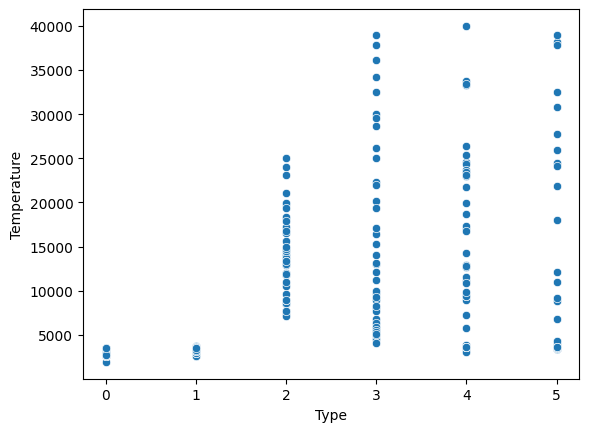

In [82]:
sns.scatterplot(data= df, x = "Type" , y="Temperature");

<Axes: xlabel='Temperature', ylabel='A_M'>

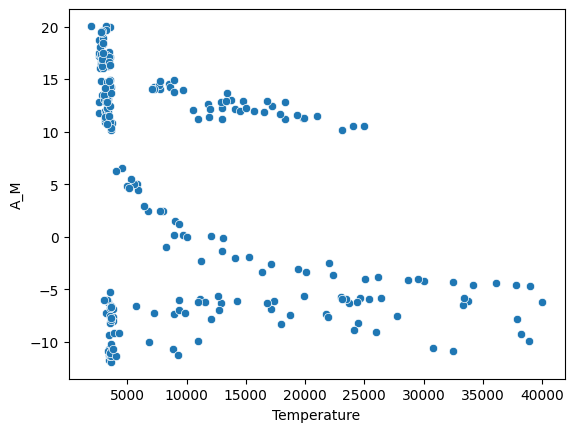

In [83]:
sns.scatterplot(data =df, x = "Temperature", y = "A_M")

In [84]:
X = df.drop(columns=["Type"], axis =1)
y = df.Type
print("X shape --> ", X.shape)
print("y shape --> ", y.shape)

X shape -->  (240, 6)
y shape -->  (240,)


In [85]:
X

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Blue,O
237,8829,537493.000000,1423.0000,-10.73,White,A
238,9235,404940.000000,1112.0000,-11.23,White,A


In [86]:
y

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Type, Length: 240, dtype: int64

In [87]:
X = pd.get_dummies(X)
X.head()

,Temperature,L,R,A_M,Color_Blue,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,Color_Orange,...,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [88]:
Str = StandardScaler()
X = Str.fit_transform(X)
X

array([[-0.7793821 , -0.59862356, -0.45920992, ..., -0.16012815,
         1.07803625, -0.4472136 ],
       [-0.78210961, -0.59862357, -0.45924053, ..., -0.16012815,
         1.07803625, -0.4472136 ],
       [-0.82847728, -0.59862357, -0.45934168, ..., -0.16012815,
         1.07803625, -0.4472136 ],
       ...,
       [-0.17502879,  2.40315735,  2.29779992, ..., -0.16012815,
        -0.92761259, -0.4472136 ],
       [-0.13243767,  1.66287782,  1.69517694, ..., -0.16012815,
        -0.92761259, -0.4472136 ],
       [ 2.87275403,  1.04834522,  2.99536993, ..., -0.16012815,
        -0.92761259,  2.23606798]])

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42 , test_size= 0.2 )

In [90]:
print("X_train --> " ,X_train.shape)
print("y_train --> " ,y_train.shape)
print("y_test --> " ,y_test.shape)
print("X_test --> " ,X_test.shape)

X_train -->  (192, 28)
y_train -->  (192,)
y_test -->  (48,)
X_test -->  (48, 28)


In [91]:
Dr =DecisionTreeClassifier(max_depth = 3)
#train model
Dr.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [92]:
r2_score(y_train , Dr.predict(X_train))

0.9466400889331851

In [93]:
mean_squared_error(y_train, Dr.predict(X_train))

0.15104166666666666

In [94]:
y_pred = Dr.predict(X_test)

In [95]:
y_test

24     2
6      0
93     3
109    4
104    4
172    5
233    5
86     2
9      0
143    2
45     4
206    2
114    5
168    4
113    5
230    5
185    0
15     1
152    3
125    0
127    0
19     1
235    5
30     3
176    5
150    3
10     1
201    2
237    5
153    3
96     3
228    4
25     2
182    0
18     1
69     0
192    1
55     5
79     1
175    5
227    4
112    5
221    4
16     1
156    3
66     0
165    4
38     3
Name: Type, dtype: int64

In [96]:
y_pred

array([2, 0, 3, 4, 4, 4, 4, 2, 0, 2, 4, 2, 4, 4, 4, 4, 0, 1, 3, 0, 0, 1,
       4, 3, 4, 3, 1, 2, 4, 3, 3, 4, 2, 0, 1, 0, 1, 4, 1, 4, 4, 4, 4, 1,
       3, 0, 4, 3], dtype=int64)

In [56]:
r2_score(y_test,y_pred)

0.9285327558202491

## MLP

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder




In [115]:
# Membaca file CSV
data = pd.read_csv('Stars.csv')



In [116]:
# Mengubah label kategori menjadi bilangan bulat
label_encoder = LabelEncoder()
data['Color'] = label_encoder.fit_transform(data['Color'])
data['Spectral_Class'] = label_encoder.fit_transform(data['Spectral_Class'])
data['Type'] = label_encoder.fit_transform(data['Type'])


In [117]:
# Memisahkan fitur dan label
X = data.drop('Type', axis=1)
y = data['Type']

In [118]:
# Pembagian data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [119]:
# Membangun model MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

In [120]:
# Melatih model dengan data latih
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

In [121]:
# Melakukan prediksi pada data uji
y_pred = mlp.predict(X_test)

In [124]:
print(y_pred)
print(y_test)
print(y_train)

[3 2 2 4 4 4 4 3 2 3 4 3 4 4 4 4 2 2 3 2 2 2 4 5 4 5 2 3 4 3 3 4 3 2 2 2 2
 4 2 4 4 4 4 2 3 2 4 2]
24     2
6      0
93     3
109    4
104    4
172    5
233    5
86     2
9      0
143    2
45     4
206    2
114    5
168    4
113    5
230    5
185    0
15     1
152    3
125    0
127    0
19     1
235    5
30     3
176    5
150    3
10     1
201    2
237    5
153    3
96     3
228    4
25     2
182    0
18     1
69     0
192    1
55     5
79     1
175    5
227    4
112    5
221    4
16     1
156    3
66     0
165    4
38     3
Name: Type, dtype: int64
139    1
60     0
204    2
186    0
207    2
      ..
106    4
14     1
92     3
179    5
102    4
Name: Type, Length: 192, dtype: int64


In [122]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi MLP: {:.2f}%".format(accuracy * 100))

Akurasi MLP: 25.00%
